In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Cargar los datos
hipotesis = pd.read_csv('Tabla_Hipotesis.csv', engine='python')

In [4]:
hipotesis

,Unnamed: 0.1,Unnamed: 0,Genero,NivelEstudios,TipoContratacion,TipoPersonal,TipoJornada,Rotacion,ExperienciaActual,Categoria_Num,Verd_Fals
0,13272,13297,0,9,5,2,3,1,6,1,True
1,3240,3265,0,9,5,2,3,2,8,1,True
2,13519,13544,1,4,4,1,3,1,7,0,False
3,20891,20916,0,9,5,2,3,2,8,1,True
4,12207,12232,1,6,5,3,3,2,3,0,False
...,...,...,...,...,...,...,...,...,...,...,...
4215,4182,4207,0,9,5,3,3,2,8,1,True
4216,20014,20039,1,8,5,1,2,1,6,1,True
4217,15580,15605,1,9,5,1,3,2,5,1,True
4218,13477,13502,0,6,5,3,3,1,8,1,True


In [3]:
hipotesis.head()

,Unnamed: 0.1,Unnamed: 0,Genero,NivelEstudios,TipoContratacion,TipoPersonal,TipoJornada,Rotacion,ExperienciaActual,Categoria_Num,Verd_Fals
0,13272,13297,0,9,5,2,3,1,6,1,True
1,3240,3265,0,9,5,2,3,2,8,1,True
2,13519,13544,1,4,4,1,3,1,7,0,False
3,20891,20916,0,9,5,2,3,2,8,1,True
4,12207,12232,1,6,5,3,3,2,3,0,False


In [4]:
#Para convertir los numeros de 1 a 0 en lo que representan en Genero
gen_ = {1:'Masculino', 0:'Femenino'}
hipotesis['Genero'] = hipotesis['Genero'].map(gen_)

#Para convertir los numeros de 9 a 1 en lo que representan en NivelEstudios
estudio_ = {9:'Licenciatura', 8:'Secundaria', 7:'Preparatoria', 6:'Bachillerato', 5:'TecnicoSuperior', 4:'SinFormacion', 3:'Maestria', 2:'Primaria', 1:'Doctorado'}
hipotesis['NivelEstudios'] = hipotesis['NivelEstudios'].map(estudio_)

#Para convertir los numeros de 5 a 1 en los que representan en TipoContratacion
contratacion_ = {5:'tiempoindeterminado', 4:'porObraoProyecto',3:'tiempodeterminado',2:'otro',1:'honorarios'}
hipotesis['TipoContratacion'] = hipotesis['TipoContratacion'].map(contratacion_)

#Para convertir los numeros de 3 a 1 en los que representan en TipoPersonal
tipoPersonal_ = {3:'confianza',2:'ninguno',1:'sindicalizado'}
hipotesis['TipoPersonal'] = hipotesis['TipoPersonal'].map(tipoPersonal_)

#Para convertir los numeros de 3 a 1 en los que representan en TipoJornada
tipoJornada_ = {3:'diurno',2:'mixto',1:'nocturno'}
hipotesis['TipoJornada'] = hipotesis['TipoJornada'].map(tipoJornada_)

#Para convertir los numeros de 2 a 1 en los que representan en Rotacion
rotacion_ = {2:'NO',1:'SI'}
hipotesis['Rotacion'] = hipotesis['Rotacion'].map(rotacion_)

#Para convertir los numeros de 8 a 1 en los que representan en ExperienciaActual
experiencia_ = {8:'1A4A',7:'Menos6M',6:'5A9A',5:'6M1A',4:'10A14A',3:'15A19A',2:'20A24A',1:'Mas25A'}
hipotesis['ExperienciaActual'] = hipotesis['ExperienciaActual'].map(experiencia_)

In [5]:
hipotesis

,Unnamed: 0.1,Unnamed: 0,Genero,NivelEstudios,TipoContratacion,TipoPersonal,TipoJornada,Rotacion,ExperienciaActual,Categoria_Num,Verd_Fals
0,13272,13297,Femenino,Licenciatura,tiempoindeterminado,ninguno,diurno,SI,5A9A,1,True
1,3240,3265,Femenino,Licenciatura,tiempoindeterminado,ninguno,diurno,NO,1A4A,1,True
2,13519,13544,Masculino,SinFormacion,porObraoProyecto,sindicalizado,diurno,SI,Menos6M,0,False
3,20891,20916,Femenino,Licenciatura,tiempoindeterminado,ninguno,diurno,NO,1A4A,1,True
4,12207,12232,Masculino,Bachillerato,tiempoindeterminado,confianza,diurno,NO,15A19A,0,False
...,...,...,...,...,...,...,...,...,...,...,...
4215,4182,4207,Femenino,Licenciatura,tiempoindeterminado,confianza,diurno,NO,1A4A,1,True
4216,20014,20039,Masculino,Secundaria,tiempoindeterminado,sindicalizado,mixto,SI,5A9A,1,True
4217,15580,15605,Masculino,Licenciatura,tiempoindeterminado,sindicalizado,diurno,NO,6M1A,1,True
4218,13477,13502,Femenino,Bachillerato,tiempoindeterminado,confianza,diurno,SI,1A4A,1,True


In [6]:
hipotesis.to_csv('Tabla_Hipotesis_Significados.csv')

In [7]:
df = pd.read_csv('Tabla_Hipotesis_Significados.csv', engine='python')
df_all = pd.read_csv('Tabla_Resultados_Significados.csv')

In [8]:
df.dtypes

Unnamed: 0.2          int64
Unnamed: 0.1          int64
Unnamed: 0            int64
Genero               object
NivelEstudios        object
TipoContratacion     object
TipoPersonal         object
TipoJornada          object
Rotacion             object
ExperienciaActual    object
Categoria_Num         int64
Verd_Fals              bool
dtype: object

In [9]:
df.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Genero,NivelEstudios,TipoContratacion,TipoPersonal,TipoJornada,Rotacion,ExperienciaActual,Categoria_Num,Verd_Fals
0,0,13272,13297,Femenino,Licenciatura,tiempoindeterminado,ninguno,diurno,SI,5A9A,1,True
1,1,3240,3265,Femenino,Licenciatura,tiempoindeterminado,ninguno,diurno,NO,1A4A,1,True
2,2,13519,13544,Masculino,SinFormacion,porObraoProyecto,sindicalizado,diurno,SI,Menos6M,0,False
3,3,20891,20916,Femenino,Licenciatura,tiempoindeterminado,ninguno,diurno,NO,1A4A,1,True
4,4,12207,12232,Masculino,Bachillerato,tiempoindeterminado,confianza,diurno,NO,15A19A,0,False


In [10]:
df.shape

(4220, 12)

In [11]:
df = df.loc[:, ['Genero','NivelEstudios','TipoContratacion','TipoPersonal','TipoJornada','Rotacion','ExperienciaActual', 'Categoria_Num']]
df

,Genero,NivelEstudios,TipoContratacion,TipoPersonal,TipoJornada,Rotacion,ExperienciaActual,Categoria_Num
0,Femenino,Licenciatura,tiempoindeterminado,ninguno,diurno,SI,5A9A,1
1,Femenino,Licenciatura,tiempoindeterminado,ninguno,diurno,NO,1A4A,1
2,Masculino,SinFormacion,porObraoProyecto,sindicalizado,diurno,SI,Menos6M,0
3,Femenino,Licenciatura,tiempoindeterminado,ninguno,diurno,NO,1A4A,1
4,Masculino,Bachillerato,tiempoindeterminado,confianza,diurno,NO,15A19A,0
...,...,...,...,...,...,...,...,...
4215,Femenino,Licenciatura,tiempoindeterminado,confianza,diurno,NO,1A4A,1
4216,Masculino,Secundaria,tiempoindeterminado,sindicalizado,mixto,SI,5A9A,1
4217,Masculino,Licenciatura,tiempoindeterminado,sindicalizado,diurno,NO,6M1A,1
4218,Femenino,Bachillerato,tiempoindeterminado,confianza,diurno,SI,1A4A,1


In [12]:
mujeres = df[df['Genero'] == 'Femenino']
hombres = df[df['Genero'] == 'Masculino']

In [13]:
mujeres

,Genero,NivelEstudios,TipoContratacion,TipoPersonal,TipoJornada,Rotacion,ExperienciaActual,Categoria_Num
0,Femenino,Licenciatura,tiempoindeterminado,ninguno,diurno,SI,5A9A,1
1,Femenino,Licenciatura,tiempoindeterminado,ninguno,diurno,NO,1A4A,1
3,Femenino,Licenciatura,tiempoindeterminado,ninguno,diurno,NO,1A4A,1
5,Femenino,Licenciatura,tiempoindeterminado,confianza,diurno,NO,1A4A,1
11,Femenino,Licenciatura,tiempoindeterminado,confianza,diurno,NO,6M1A,0
...,...,...,...,...,...,...,...,...
4204,Femenino,Preparatoria,porObraoProyecto,ninguno,nocturno,NO,Menos6M,1
4205,Femenino,Maestria,tiempoindeterminado,sindicalizado,diurno,NO,5A9A,1
4209,Femenino,Licenciatura,tiempoindeterminado,confianza,diurno,NO,5A9A,1
4215,Femenino,Licenciatura,tiempoindeterminado,confianza,diurno,NO,1A4A,1


In [16]:
hombres

,Genero,NivelEstudios,TipoContratacion,TipoPersonal,TipoJornada,Rotacion,ExperienciaActual,Categoria_Num
2,Masculino,SinFormacion,porObraoProyecto,sindicalizado,diurno,SI,Menos6M,0
4,Masculino,Bachillerato,tiempoindeterminado,confianza,diurno,NO,15A19A,0
6,Masculino,Preparatoria,tiempoindeterminado,confianza,diurno,NO,5A9A,1
7,Masculino,Maestria,tiempoindeterminado,ninguno,diurno,NO,Menos6M,1
8,Masculino,Licenciatura,tiempoindeterminado,confianza,diurno,NO,Menos6M,1
...,...,...,...,...,...,...,...,...
4213,Masculino,Secundaria,tiempodeterminado,ninguno,nocturno,NO,Menos6M,0
4214,Masculino,Secundaria,tiempodeterminado,sindicalizado,mixto,SI,Mas25A,1
4216,Masculino,Secundaria,tiempoindeterminado,sindicalizado,mixto,SI,5A9A,1
4217,Masculino,Licenciatura,tiempoindeterminado,sindicalizado,diurno,NO,6M1A,1


In [14]:
mujeresYes = mujeres[mujeres['Categoria_Num'] == 1]
mujeresNo = mujeres[mujeres['Categoria_Num'] == 0]

In [18]:
hombresYes = hombres[hombres['Categoria_Num'] == 1]
hombresNo = hombres[hombres['Categoria_Num'] == 0]

In [19]:
#mn3 = 18, my3=125,  hn3=89, hy3=388
nivel_Prepataroria4 = hombresYes[hombresYes['NivelEstudios'] == 'Preparatoria']
hy3 = len(nivel_Prepataroria4)
hy3

388

In [20]:
#mujeresNo
nivel_Licenciatura1 = mujeresNo[mujeresNo['NivelEstudios'] == 'Licenciatura']
mn1 = len(nivel_Licenciatura1)

nivel_Secundaria1 = mujeresNo[mujeresNo['NivelEstudios'] == 'Secundaria']
mn2 = len(nivel_Secundaria1)

nivel_Prepataroria1 = mujeresNo[mujeresNo['NivelEstudios'] == 'Preparatoria']
mn3 = len(nivel_Prepataroria1)

nivel_Bachillerato1 = mujeresNo[mujeresNo['NivelEstudios'] == 'Bachillerato']
mn4 = len(nivel_Bachillerato1)

nivel_TecnicoSuperior1 = mujeresNo[mujeresNo['NivelEstudios'] == 'TecnicoSuperior']
mn5 = len(nivel_TecnicoSuperior1)

nivel_SinFormacion1 = mujeresNo[mujeresNo['NivelEstudios'] == 'SinFormacion']
mn6 = len(nivel_SinFormacion1)

nivel_Maestria1 = mujeresNo[mujeresNo['NivelEstudios'] == 'Maestria']
mn7 = len(nivel_Maestria1)

nivel_Primaria1 = mujeresNo[mujeresNo['NivelEstudios'] == 'Primaria']
mn8 = len(nivel_Primaria1)

nivel_Doctorado1 = mujeresNo[mujeresNo['NivelEstudios'] == 'Doctorado']
mn9 = len(nivel_Doctorado1)

#mujeresYes
nivel_Licenciatura2 = mujeresYes[mujeresYes['NivelEstudios'] == 'Licenciatura']
my1 = len(nivel_Licenciatura2)

nivel_Secundaria2 = mujeresYes[mujeresYes['NivelEstudios'] == 'Secundaria']
my2 = len(nivel_Secundaria2)

nivel_Prepataroria2 = mujeresYes[mujeresYes['NivelEstudios'] == 'Preparatoria']
my3 = len(nivel_Prepataroria2)

nivel_Bachillerato2 = mujeresYes[mujeresYes['NivelEstudios'] == 'Bachillerato']
my4 = len(nivel_Bachillerato2)

nivel_TecnicoSuperior2 = mujeresYes[mujeresYes['NivelEstudios'] == 'TecnicoSuperior']
my5 = len(nivel_TecnicoSuperior2)

nivel_SinFormacion2 = mujeresYes[mujeresYes['NivelEstudios'] == 'SinFormacion']
my6 = len(nivel_SinFormacion2)

nivel_Maestria2 = mujeresYes[mujeresYes['NivelEstudios'] == 'Maestria']
my7 = len(nivel_Maestria2)

nivel_Primaria2 = mujeresYes[mujeresYes['NivelEstudios'] == 'Primaria']
my8 = len(nivel_Primaria2)

nivel_Doctorado2 = mujeresYes[mujeresYes['NivelEstudios'] == 'Doctorado']
my9 = len(nivel_Doctorado2)

#hombresNo
nivel_Licenciatura3 = hombresNo[hombresNo['NivelEstudios'] == 'Licenciatura']
hn1 = len(nivel_Licenciatura3)

nivel_Secundaria3 = hombresNo[hombresNo['NivelEstudios'] == 'Secundaria']
hn2 = len(nivel_Secundaria3)

nivel_Prepataroria3 = hombresNo[hombresNo['NivelEstudios'] == 'Preparatoria']
hn3 = len(nivel_Prepataroria3)

nivel_Bachillerato3 = hombresNo[hombresNo['NivelEstudios'] == 'Bachillerato']
hn4 = len(nivel_Bachillerato3)

nivel_TecnicoSuperior3 = hombresNo[hombresNo['NivelEstudios'] == 'TecnicoSuperior']
hn5 = len(nivel_TecnicoSuperior3)

nivel_SinFormacion3 = hombresNo[hombresNo['NivelEstudios'] == 'SinFormacion']
hn6 = len(nivel_SinFormacion3)

nivel_Maestria3 = hombresNo[hombresNo['NivelEstudios'] == 'Maestria']
hn7 = len(nivel_Maestria3)

nivel_Primaria3 = hombresNo[hombresNo['NivelEstudios'] == 'Primaria']
hn8 = len(nivel_Primaria3)

nivel_Doctorado3 = hombresNo[hombresNo['NivelEstudios'] == 'Doctorado']
hn9 = len(nivel_Doctorado3)

#hombresYes
nivel_Licenciatura4 = hombresYes[hombresYes['NivelEstudios'] == 'Licenciatura']
hy1 = len(nivel_Licenciatura4)

nivel_Secundaria4 = hombresYes[hombresYes['NivelEstudios'] == 'Secundaria']
hy2 = len(nivel_Secundaria4)

nivel_Prepataroria4 = hombresYes[hombresYes['NivelEstudios'] == 'Preparatoria']
hy3 = len(nivel_Prepataroria4)

nivel_Bachillerato4 = hombresYes[hombresYes['NivelEstudios'] == 'Bachillerato']
hy4 = len(nivel_Bachillerato4)

nivel_TecnicoSuperior4 = hombresYes[hombresYes['NivelEstudios'] == 'TecnicoSuperior']
hy5 = len(nivel_TecnicoSuperior4)

nivel_SinFormacion4 = hombresYes[hombresYes['NivelEstudios'] == 'SinFormacion']
hy6 = len(nivel_SinFormacion4)

nivel_Maestria4 = hombresYes[hombresYes['NivelEstudios'] == 'Maestria']
hy7 = len(nivel_Maestria4)

nivel_Primaria4 = hombresYes[hombresYes['NivelEstudios'] == 'Primaria']
hy8 = len(nivel_Primaria4)

nivel_Doctorado4 = hombresYes[hombresYes['NivelEstudios'] == 'Doctorado']
hy9 = len(nivel_Doctorado4)

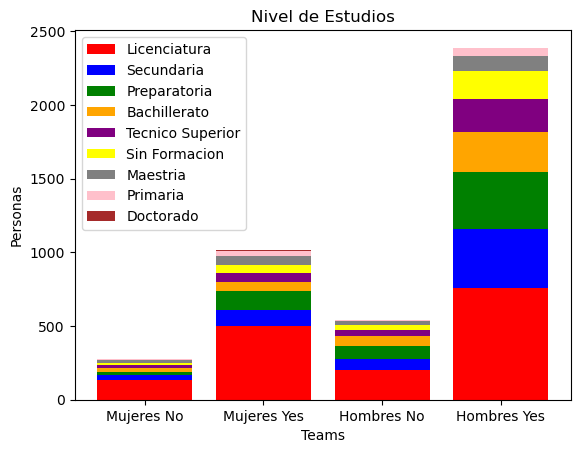

In [34]:
x = ["Mujeres No", "Mujeres Yes", "Hombres No", "Hombres Yes"]
y1 = np.array([mn1, my1, hn1, hy1])
y2 = np.array([mn2, my2, hn2, hy2])
y3  = np.array([mn3, my3, hn3, hy3])
y4 = np.array([mn4, my4, hn4, hy4])
y5 = np.array([mn5, my5, hn5, hy5])
y6 = np.array([mn6, my6, hn6, hy6])
y7 = np.array([mn7, my7, hn7, hy7])
y8 = np.array([mn8, my8, hn8, hy8])
y9 = np.array([mn9, my9, hn9, hy9])

plt.bar(x, y1, color="red")
plt.bar(x, y2, bottom=y1, color="blue")
plt.bar(x, y3, bottom=y1+y2, color="green")
plt.bar(x, y4, bottom=y1+y2+y3, color="orange")
plt.bar(x, y5, bottom=y1+y2+y3+y4, color="purple")
plt.bar(x, y6, bottom=y1+y2+y3+y4+y5, color="yellow")
plt.bar(x, y7, bottom=y1+y2+y3+y4+y5+y6, color="Gray")
plt.bar(x, y8, bottom=y1+y2+y3+y4+y5+y6+y7, color="Pink")
plt.bar(x, y9, bottom=y1+y2+y3+y4+y5+y6+y7+y8, color="Brown")

plt.xlabel("Teams")
plt.ylabel("Personas")
plt.legend(["Licenciatura", "Secundaria", "Preparatoria", "Bachillerato", "Tecnico Superior","Sin Formacion","Maestria","Primaria","Doctorado"])
plt.title("Nivel de Estudios")
plt.show()

C:\Users\DELL G15\AppData\Local\Temp\ipykernel_15380\291638123.py:16: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  group_sum = result.groupby(['x1'])['Licenciatura', 'Secundaria', 'Preaparatoria', 'Bachillerato', 'Tecnico Superior', 'Sin Formacion', 'Maestria', 'Primaria', 'Doctorado'].sum()


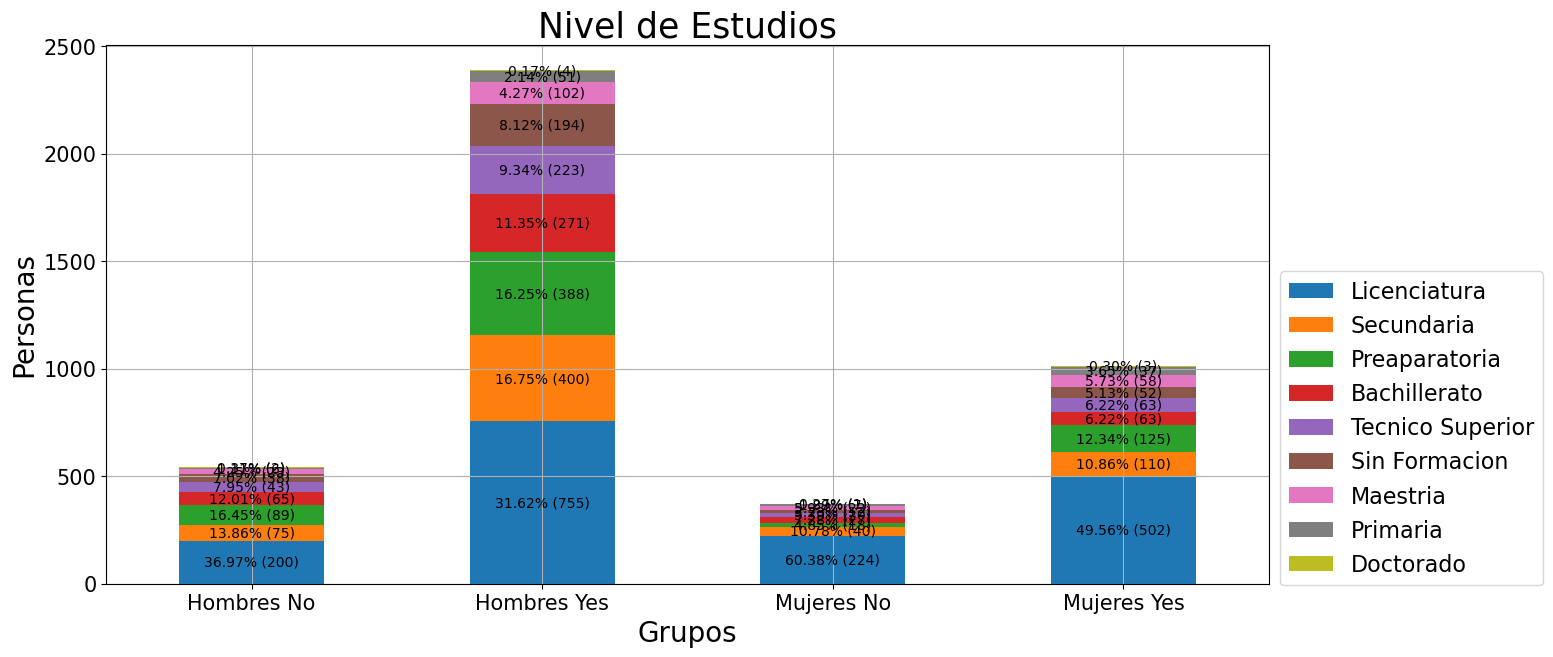

In [148]:
# DataFrame de ejemplo
result = pd.DataFrame({
    "x1": ('Mujeres No', 'Mujeres Yes', 'Hombres No','Hombres Yes'),
    "Licenciatura": (mn1, my1, hn1, hy1),
    "Secundaria": (mn2, my2, hn2, hy2),
    "Preaparatoria": (mn3, my3, hn3, hy3),
    "Bachillerato": (mn4, my4, hn4, hy4),
    "Tecnico Superior": (mn5, my5, hn5, hy5),
    "Sin Formacion": (mn6, my6, hn6, hy6),
    "Maestria": (mn7, my7, hn7, hy7),
    "Primaria": (mn8, my8, hn8, hy8),
    "Doctorado": (mn9, my9, hn9, hy9)
})


group_sum = result.groupby(['x1'])['Licenciatura', 'Secundaria', 'Preaparatoria', 'Bachillerato', 'Tecnico Superior', 'Sin Formacion', 'Maestria', 'Primaria', 'Doctorado'].sum()
ax = group_sum.plot.bar(figsize=(15, 7), stacked=True)

ax.set_title('Nivel de Estudios', fontsize=25)  # Titulo de la grafica
ax.set_ylabel('Personas', fontsize=20) # Titulo eje y
ax.set_xlabel('Grupos', fontsize=20) # Titulo eje x
ax.legend(bbox_to_anchor=(1, 0.6), fontsize=16) #ubicación leyenda
ax.tick_params(axis="x", rotation=0, labelsize=15)
ax.tick_params(axis="y", labelsize=15)
ax.grid(True)

abs_values = group_sum.values
rel_values = abs_values / abs_values.sum(axis=1, keepdims=True) * 100

labels = zip(abs_values.T.flatten(), rel_values.T.flatten())

for path in ax.patches:
    abs_value, rel_value = next(labels)
    label = f"{rel_value:.2f}% ({abs_value})"
    width, height = path.get_width(), path.get_height()
    x, y = path.get_xy() 
    ax.text(x=x + width / 2, 
            y=y + height / 2, 
            s=label,
            horizontalalignment='center', 
            verticalalignment='center'
            )
plt.show()

In [55]:
#mujeresNo
TipoCon_tiempoind_1 = mujeresNo[mujeresNo['TipoContratacion'] == 'tiempoindeterminado']
mn_2_1 = len(TipoCon_tiempoind_1)

TipoCon_porObraoProyecto_1 = mujeresNo[mujeresNo['TipoContratacion'] == 'porObraoProyecto']
mn_2_2 = len(TipoCon_porObraoProyecto_1)

TipoCon_tiempodeterminado_1 = mujeresNo[mujeresNo['TipoContratacion'] == 'tiempodeterminado']
mn_2_3 = len(TipoCon_tiempodeterminado_1)

TipoCon_otro_1 = mujeresNo[mujeresNo['TipoContratacion'] == 'otro']
mn_2_4 = len(TipoCon_otro_1)

TipoCon_honorarios_1 = mujeresNo[mujeresNo['TipoContratacion'] == 'honorarios']
mn_2_5 = len(TipoCon_honorarios_1)

#mujeresYes
TipoCon_tiempoind_2 = mujeresYes[mujeresYes['TipoContratacion'] == 'tiempoindeterminado']
my_2_1 = len(TipoCon_tiempoind_2)

TipoCon_porObraoProyecto_2 = mujeresYes[mujeresYes['TipoContratacion'] == 'porObraoProyecto']
my_2_2 = len(TipoCon_porObraoProyecto_2)

TipoCon_tiempodeterminado_2 = mujeresYes[mujeresYes['TipoContratacion'] == 'tiempodeterminado']
my_2_3 = len(TipoCon_tiempodeterminado_2)

TipoCon_otro_2 = mujeresYes[mujeresYes['TipoContratacion'] == 'otro']
my_2_4 = len(TipoCon_otro_2)

TipoCon_honorarios_2 = mujeresYes[mujeresYes['TipoContratacion'] == 'honorarios']
my_2_5 = len(TipoCon_honorarios_2)

#hombresNo
TipoCon_tiempoind_3 = hombresNo[hombresNo['TipoContratacion'] == 'tiempoindeterminado']
hn_2_1 = len(TipoCon_tiempoind_3)

TipoCon_porObraoProyecto_3 = hombresNo[hombresNo['TipoContratacion'] == 'porObraoProyecto']
hn_2_2 = len(TipoCon_porObraoProyecto_3)

TipoCon_tiempodeterminado_3 = hombresNo[hombresNo['TipoContratacion'] == 'tiempodeterminado']
hn_2_3 = len(TipoCon_tiempodeterminado_3)

TipoCon_otro_3 = hombresNo[hombresNo['TipoContratacion'] == 'otro']
hn_2_4 = len(TipoCon_otro_3)

TipoCon_honorarios_3 = hombresNo[hombresNo['TipoContratacion'] == 'honorarios']
hn_2_5 = len(TipoCon_honorarios_3)

#hombresYes
TipoCon_tiempoind_4 = hombresYes[hombresYes['TipoContratacion'] == 'tiempoindeterminado']
hy_2_1 = len(TipoCon_tiempoind_4)

TipoCon_porObraoProyecto_4 = hombresYes[hombresYes['TipoContratacion'] == 'porObraoProyecto']
hy_2_2 = len(TipoCon_porObraoProyecto_4)

TipoCon_tiempodeterminado_4 = hombresYes[hombresYes['TipoContratacion'] == 'tiempodeterminado']
hy_2_3 = len(TipoCon_tiempodeterminado_4)

TipoCon_otro_4 = hombresYes[hombresYes['TipoContratacion'] == 'otro']
hy_2_4 = len(TipoCon_otro_4)

TipoCon_honorarios_4 = hombresYes[hombresYes['TipoContratacion'] == 'honorarios']
hy_2_5 = len(TipoCon_honorarios_4)


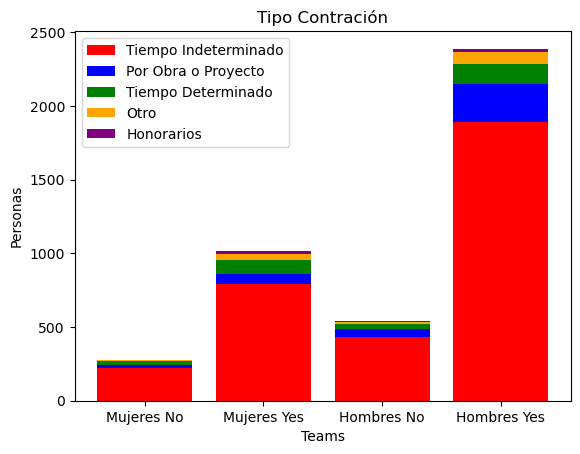

In [61]:
x1 = ["Mujeres No", "Mujeres Yes", "Hombres No", "Hombres Yes"]
y2_1 = np.array([mn_2_1, my_2_1, hn_2_1, hy_2_1])
y2_2 = np.array([mn_2_2, my_2_2, hn_2_2, hy_2_2])
y2_3 = np.array([mn_2_3, my_2_3, hn_2_3, hy_2_3])
y2_4 = np.array([mn_2_4, my_2_4, hn_2_4, hy_2_4])
y2_5 = np.array([mn_2_5, my_2_5, hn_2_5, hy_2_5])

plt.bar(x1, y2_1, color="red")
plt.bar(x1, y2_2, bottom=y2_1, color="blue")
plt.bar(x1, y2_3, bottom=y2_1+y2_2, color="green")
plt.bar(x1, y2_4, bottom=y2_1+y2_2+y2_3, color="orange")
plt.bar(x1, y2_5, bottom=y2_1+y2_2+y2_3+y2_4, color="purple")

plt.xlabel("Teams")
plt.ylabel("Personas")
plt.legend(["Tiempo Indeterminado", "Por Obra o Proyecto", "Tiempo Determinado", "Otro", "Honorarios"])
plt.title("Tipo Contración")
plt.show()

C:\Users\DELL G15\AppData\Local\Temp\ipykernel_15380\3817333829.py:12: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  group_sum = result.groupby(['x1'])['Tiempo Indeterminado', 'Por Obra o Proyecto', 'Tiempo Determinado', 'Otro', 'Honorarios'].sum()


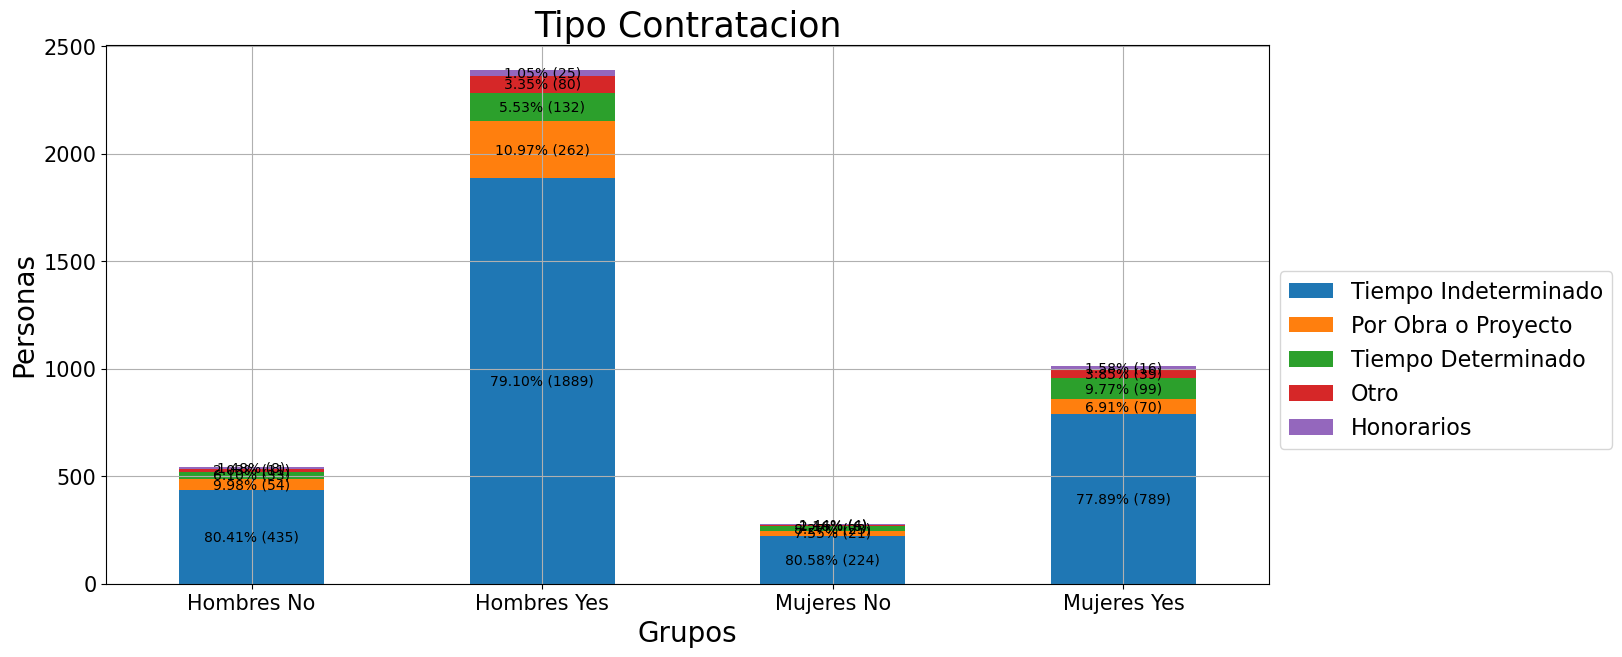

In [147]:
# DataFrame de ejemplo
result = pd.DataFrame({
    "x1": ('Mujeres No', 'Mujeres Yes', 'Hombres No','Hombres Yes'),
    "Tiempo Indeterminado": (mn_2_1, my_2_1, hn_2_1, hy_2_1),
    "Por Obra o Proyecto": (mn_2_2, my_2_2, hn_2_2, hy_2_2),
    "Tiempo Determinado": (mn_2_3, my_2_3, hn_2_3, hy_2_3),
    "Otro": (mn_2_4, my_2_4, hn_2_4, hy_2_4),
    "Honorarios": (mn_2_5, my_2_5, hn_2_5, hy_2_5)
})


group_sum = result.groupby(['x1'])['Tiempo Indeterminado', 'Por Obra o Proyecto', 'Tiempo Determinado', 'Otro', 'Honorarios'].sum()
ax = group_sum.plot.bar(figsize=(15, 7), stacked=True)

ax.set_title('Tipo Contratacion', fontsize=25)  # Titulo de la grafica
ax.set_ylabel('Personas', fontsize=20) # Titulo eje y
ax.set_xlabel('Grupos', fontsize=20) # Titulo eje x
ax.legend(bbox_to_anchor=(1, 0.6), fontsize=16) #ubicación leyenda
ax.tick_params(axis="x", rotation=0, labelsize=15)
ax.tick_params(axis="y", labelsize=15)
ax.grid(True)

abs_values = group_sum.values
rel_values = abs_values / abs_values.sum(axis=1, keepdims=True) * 100

labels = zip(abs_values.T.flatten(), rel_values.T.flatten())

for path in ax.patches:
    abs_value, rel_value = next(labels)
    label = f"{rel_value:.2f}% ({abs_value})"
    width, height = path.get_width(), path.get_height()
    x, y = path.get_xy() 
    ax.text(x=x + width / 2, 
            y=y + height / 2, 
            s=label,
            horizontalalignment='center', 
            verticalalignment='center'
            )
plt.show()

In [62]:
#mujeresNo
TipoPersonal_confianza_1 = mujeresNo[mujeresNo['TipoPersonal'] == 'confianza']
mn_3_1 = len(TipoPersonal_confianza_1)

TipoCon_ninguno_1 = mujeresNo[mujeresNo['TipoPersonal'] == 'ninguno']
mn_3_2 = len(TipoCon_ninguno_1)

TipoCon_sindicalizado_1 = mujeresNo[mujeresNo['TipoPersonal'] == 'sindicalizado']
mn_3_3 = len(TipoCon_sindicalizado_1)

#mujeresYes
TipoPersonal_confianza_2 = mujeresYes[mujeresYes['TipoPersonal'] == 'confianza']
my_3_1 = len(TipoPersonal_confianza_2)

TipoCon_ninguno_2 = mujeresYes[mujeresYes['TipoPersonal'] == 'ninguno']
my_3_2 = len(TipoCon_ninguno_2)

TipoCon_sindicalizado_2 = mujeresYes[mujeresYes['TipoPersonal'] == 'sindicalizado']
my_3_3 = len(TipoCon_sindicalizado_2)

#hombresNo
TipoPersonal_confianza_3 = hombresNo[hombresNo['TipoPersonal'] == 'confianza']
hn_3_1 = len(TipoPersonal_confianza_3)

TipoCon_porObraoProyecto_3 = hombresNo[hombresNo['TipoPersonal'] == 'ninguno']
hn_3_2 = len(TipoCon_porObraoProyecto_3)

TipoCon_tiempodeterminado_3 = hombresNo[hombresNo['TipoPersonal'] == 'sindicalizado']
hn_3_3 = len(TipoCon_tiempodeterminado_3)

#hombresYes
TipoPersonal_confianza_4 = hombresYes[hombresYes['TipoPersonal'] == 'confianza']
hy_3_1 = len(TipoPersonal_confianza_4)

TipoCon_porObraoProyecto_4 = hombresYes[hombresYes['TipoPersonal'] == 'ninguno']
hy_3_2 = len(TipoCon_porObraoProyecto_4)

TipoCon_tiempodeterminado_4 = hombresYes[hombresYes['TipoPersonal'] == 'sindicalizado']
hy_3_3 = len(TipoCon_tiempodeterminado_4)

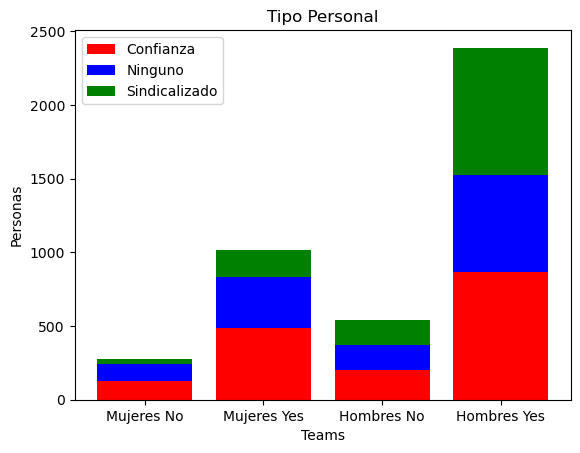

In [65]:
x2 = ["Mujeres No", "Mujeres Yes", "Hombres No", "Hombres Yes"]
y3_1 = np.array([mn_3_1, my_3_1, hn_3_1, hy_3_1])
y3_2 = np.array([mn_3_2, my_3_2, hn_3_2, hy_3_2])
y3_3 = np.array([mn_3_3, my_3_3, hn_3_3, hy_3_3])

plt.bar(x2, y3_1, color="red")
plt.bar(x2, y3_2, bottom=y3_1, color="blue")
plt.bar(x2, y3_3, bottom=y3_1+y3_2, color="green")

plt.xlabel("Teams")
plt.ylabel("Personas")
plt.legend(["Confianza", "Ninguno", "Sindicalizado"])
plt.title("Tipo Personal")
plt.show()

C:\Users\DELL G15\AppData\Local\Temp\ipykernel_15380\736723940.py:10: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  group_sum = result.groupby(['x1'])['Confianza', 'Ninguno', 'Sindicalizado'].sum()


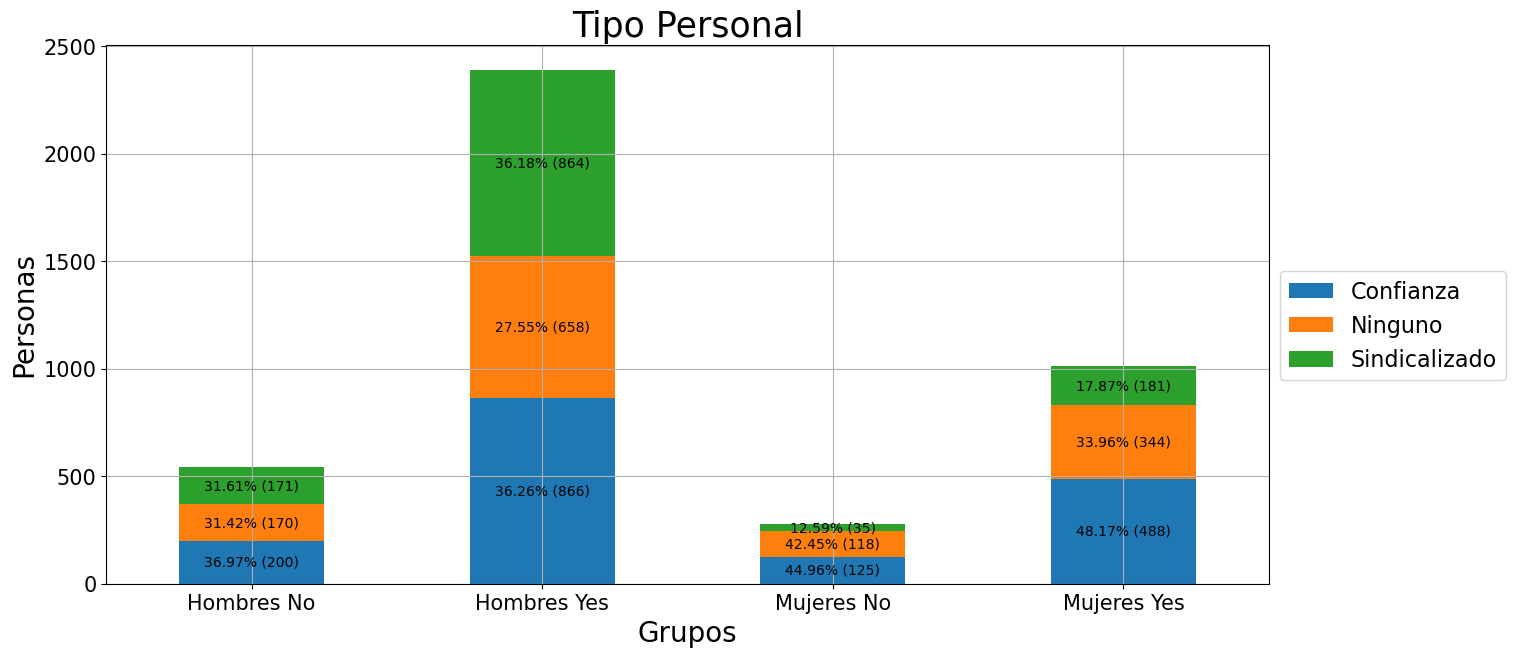

In [136]:
# DataFrame de ejemplo
result = pd.DataFrame({
    "x1": ('Mujeres No', 'Mujeres Yes', 'Hombres No','Hombres Yes'),
    "Confianza": (mn_3_1, my_3_1, hn_3_1, hy_3_1),
    "Ninguno": (mn_3_2, my_3_2, hn_3_2, hy_3_2),
    "Sindicalizado": (mn_3_3, my_3_3, hn_3_3, hy_3_3)
})


group_sum = result.groupby(['x1'])['Confianza', 'Ninguno', 'Sindicalizado'].sum()
ax = group_sum.plot.bar(figsize=(15, 7), stacked=True)

ax.set_title('Tipo Personal', fontsize=25)  # Titulo de la grafica
ax.set_ylabel('Personas', fontsize=20) # Titulo eje y
ax.set_xlabel('Grupos', fontsize=20) # Titulo eje x
ax.legend(bbox_to_anchor=(1, 0.6), fontsize=16) #ubicación leyenda
ax.tick_params(axis="x", rotation=0, labelsize=15)
ax.tick_params(axis="y", labelsize=15)
ax.grid(True)

abs_values = group_sum.values
rel_values = abs_values / abs_values.sum(axis=1, keepdims=True) * 100

labels = zip(abs_values.T.flatten(), rel_values.T.flatten())

for path in ax.patches:
    abs_value, rel_value = next(labels)
    label = f"{rel_value:.2f}% ({abs_value})"
    width, height = path.get_width(), path.get_height()
    x, y = path.get_xy() 
    ax.text(x=x + width / 2, 
            y=y + height / 2, 
            s=label,
            horizontalalignment='center', 
            verticalalignment='center'
            )
plt.show()

In [66]:
#mujeresNo
TipoJornada_diurno_1 = mujeresNo[mujeresNo['TipoJornada'] == 'diurno']
mn_4_1 = len(TipoJornada_diurno_1)

TipoJornada_mixto_1 = mujeresNo[mujeresNo['TipoJornada'] == 'mixto']
mn_4_2 = len(TipoJornada_mixto_1)

TipoJornada_nocturno_1 = mujeresNo[mujeresNo['TipoJornada'] == 'nocturno']
mn_4_3 = len(TipoJornada_nocturno_1)

#mujeresYes
TipoJornada_diurno_2 = mujeresYes[mujeresYes['TipoJornada'] == 'diurno']
my_4_1 = len(TipoJornada_diurno_2)

TipoJornada_mixto_2 = mujeresYes[mujeresYes['TipoJornada'] == 'mixto']
my_4_2 = len(TipoJornada_mixto_2)

TipoJornada_nocturno_2 = mujeresYes[mujeresYes['TipoJornada'] == 'nocturno']
my_4_3 = len(TipoJornada_nocturno_2)

#hombresNo
TipoJornada_diurno_3 = hombresNo[hombresNo['TipoJornada'] == 'diurno']
hn_4_1 = len(TipoJornada_diurno_3)

TipoJornada_mixto_3 = hombresNo[hombresNo['TipoJornada'] == 'mixto']
hn_4_2 = len(TipoJornada_mixto_3)

TipoJornada_nocturno_3 = hombresNo[hombresNo['TipoJornada'] == 'nocturno']
hn_4_3 = len(TipoJornada_nocturno_3)

#hombresYes
TipoJornada_diurno_4 = hombresYes[hombresYes['TipoJornada'] == 'diurno']
hy_4_1 = len(TipoJornada_diurno_4)

TipoJornada_mixto_4 = hombresYes[hombresYes['TipoJornada'] == 'mixto']
hy_4_2 = len(TipoJornada_mixto_4)

TipoJornada_nocturno_4 = hombresYes[hombresYes['TipoJornada'] == 'nocturno']
hy_4_3 = len(TipoJornada_nocturno_4)

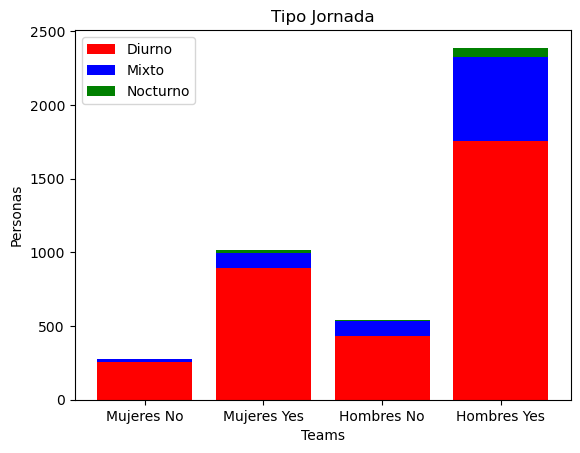

In [67]:
x3 = ["Mujeres No", "Mujeres Yes", "Hombres No", "Hombres Yes"]
y4_1 = np.array([mn_4_1, my_4_1, hn_4_1, hy_4_1])
y4_2 = np.array([mn_4_2, my_4_2, hn_4_2, hy_4_2])
y4_3 = np.array([mn_4_3, my_4_3, hn_4_3, hy_4_3])

plt.bar(x3, y4_1, color="red")
plt.bar(x3, y4_2, bottom=y4_1, color="blue")
plt.bar(x3, y4_3, bottom=y4_1+y4_2, color="green")

plt.xlabel("Teams")
plt.ylabel("Personas")
plt.legend(["Diurno", "Mixto", "Nocturno"])
plt.title("Tipo Jornada")
plt.show()

C:\Users\DELL G15\AppData\Local\Temp\ipykernel_15380\1993348292.py:10: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  group_sum = result.groupby(['x1'])['Diurno', 'Mixto', 'Nocturno'].sum()


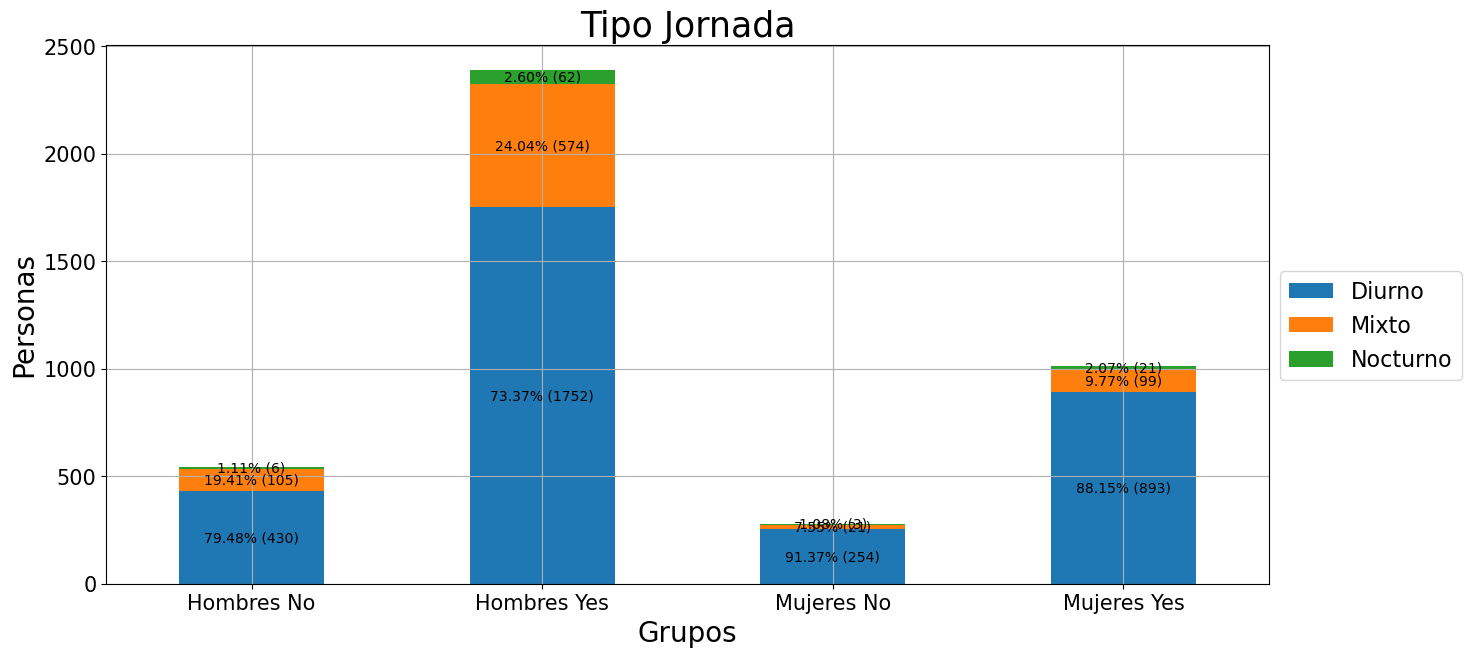

In [135]:
# DataFrame de ejemplo
result = pd.DataFrame({
    "x1": ('Mujeres No', 'Mujeres Yes', 'Hombres No','Hombres Yes'),
    "Diurno": (mn_4_1, my_4_1, hn_4_1, hy_4_1),
    "Mixto": (mn_4_2, my_4_2, hn_4_2, hy_4_2),
    "Nocturno": (mn_4_3, my_4_3, hn_4_3, hy_4_3)
})


group_sum = result.groupby(['x1'])['Diurno', 'Mixto', 'Nocturno'].sum()
ax = group_sum.plot.bar(figsize=(15, 7), stacked=True)

ax.set_title('Tipo Jornada', fontsize=25)  # Titulo de la grafica
ax.set_ylabel('Personas', fontsize=20) # Titulo eje y
ax.set_xlabel('Grupos', fontsize=20) # Titulo eje x
ax.legend(bbox_to_anchor=(1, 0.6), fontsize=16) #ubicación leyenda
ax.tick_params(axis="x", rotation=0, labelsize=15)
ax.tick_params(axis="y", labelsize=15)
ax.grid(True)

abs_values = group_sum.values
rel_values = abs_values / abs_values.sum(axis=1, keepdims=True) * 100

labels = zip(abs_values.T.flatten(), rel_values.T.flatten())

for path in ax.patches:
    abs_value, rel_value = next(labels)
    label = f"{rel_value:.2f}% ({abs_value})"
    width, height = path.get_width(), path.get_height()
    x, y = path.get_xy() 
    ax.text(x=x + width / 2, 
            y=y + height / 2, 
            s=label,
            horizontalalignment='center', 
            verticalalignment='center'
            )
plt.show()

In [121]:
#mujeresNo
Rotacion_NO_1 = mujeresNo[mujeresNo['Rotacion'] == 'NO']
mn_5_1 = len(Rotacion_NO_1)

Rotacion_SI_1 = mujeresNo[mujeresNo['Rotacion'] == 'SI']
mn_5_2 = len(Rotacion_SI_1)

#mujeresYes
Rotacion_NO_2 = mujeresYes[mujeresYes['Rotacion'] == 'NO']
my_5_1 = len(Rotacion_NO_2)

Rotacion_SI_2 = mujeresYes[mujeresYes['Rotacion'] == 'SI']
my_5_2 = len(Rotacion_SI_2)

#hombresNo
Rotacion_NO_3 = hombresNo[hombresNo['Rotacion'] == 'NO']
hn_5_1 = len(Rotacion_NO_3)

Rotacion_SI_3 = hombresNo[hombresNo['Rotacion'] == 'SI']
hn_5_2 = len(Rotacion_SI_3)

#hombresYes
Rotacion_NO_4 = hombresYes[hombresYes['Rotacion'] == 'NO']
hy_5_1 = len(Rotacion_NO_4)

Rotacion_SI_4 = hombresYes[hombresYes['Rotacion'] == 'SI']
hy_5_2 = len(Rotacion_SI_4)

C:\Users\DELL G15\AppData\Local\Temp\ipykernel_15380\3900445713.py:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  group_sum = result.groupby(['x1'])['Si', 'No'].sum()


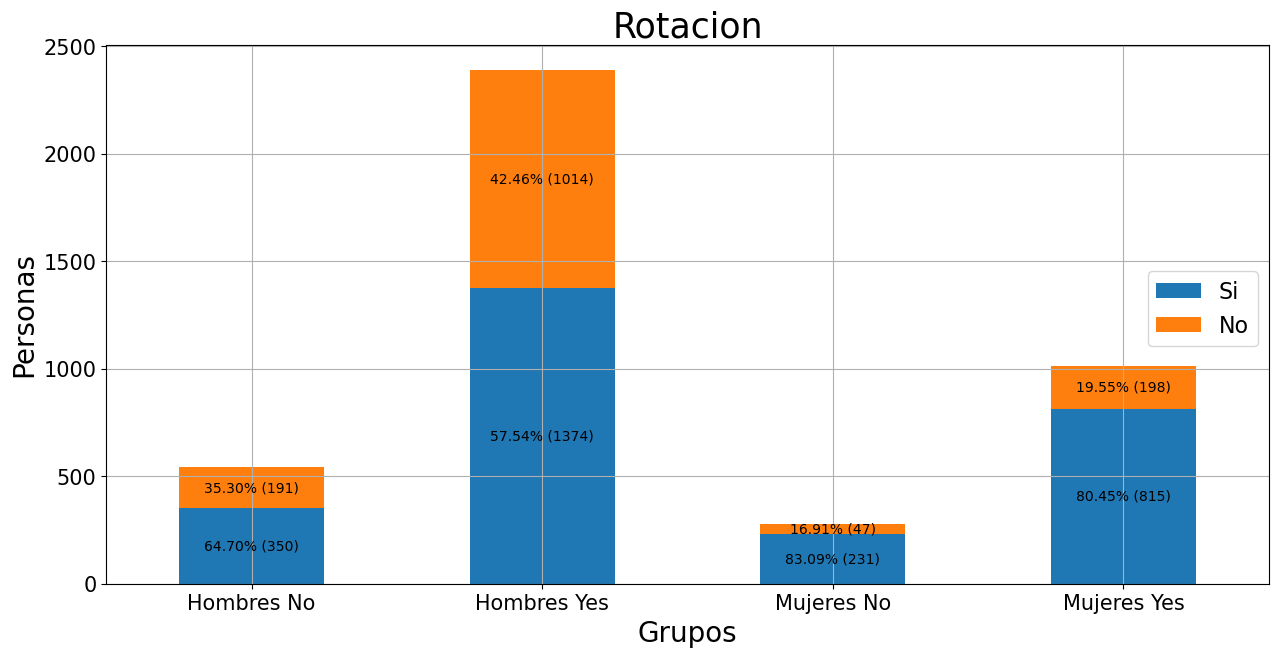

In [133]:
# DataFrame de ejemplo
result = pd.DataFrame({
    "x1": ('Mujeres No', 'Mujeres Yes', 'Hombres No','Hombres Yes'),
    "Si": (mn_5_1, my_5_1, hn_5_1, hy_5_1),
    "No": (mn_5_2, my_5_2, hn_5_2, hy_5_2)
})


group_sum = result.groupby(['x1'])['Si', 'No'].sum()
ax = group_sum.plot.bar(figsize=(15, 7), stacked=True)

ax.set_title('Rotacion', fontsize=25)  # Titulo de la grafica
ax.set_ylabel('Personas', fontsize=20) # Titulo eje y
ax.set_xlabel('Grupos', fontsize=20) # Titulo eje x
ax.legend(bbox_to_anchor=(1, 0.6), fontsize=16) #ubicación leyenda
ax.tick_params(axis="x", rotation=0, labelsize=15)
ax.tick_params(axis="y", labelsize=15)
ax.grid(True)

abs_values = group_sum.values
rel_values = abs_values / abs_values.sum(axis=1, keepdims=True) * 100

labels = zip(abs_values.T.flatten(), rel_values.T.flatten())

for path in ax.patches:
    abs_value, rel_value = next(labels)
    label = f"{rel_value:.2f}% ({abs_value})"
    width, height = path.get_width(), path.get_height()
    x, y = path.get_xy() 
    ax.text(x=x + width / 2, 
            y=y + height / 2, 
            s=label,
            horizontalalignment='center', 
            verticalalignment='center'
            )
plt.show()

In [92]:
#mujeresNo
ExperienciaActual_1AA4_1 = mujeresNo[mujeresNo['ExperienciaActual'] == '1A4A']
mn_6_1 = len(ExperienciaActual_1AA4_1)

ExperienciaActual_MenosM6_1 = mujeresNo[mujeresNo['ExperienciaActual'] == 'Menos6M']
mn_6_2 = len(ExperienciaActual_MenosM6_1)

ExperienciaActual_5AA9_1 = mujeresNo[mujeresNo['ExperienciaActual'] == '5A9A']
mn_6_3 = len(ExperienciaActual_5AA9_1)

ExperienciaActual_6MM1_1 = mujeresNo[mujeresNo['ExperienciaActual'] == '6M1A']
mn_6_4 = len(ExperienciaActual_6MM1_1)

ExperienciaActual_10AA14_1 = mujeresNo[mujeresNo['ExperienciaActual'] == '10A14A']
mn_6_5 = len(ExperienciaActual_10AA14_1)

ExperienciaActual_15AA19_1 = mujeresNo[mujeresNo['ExperienciaActual'] == '15A19A']
mn_6_6 = len(ExperienciaActual_15AA19_1)

ExperienciaActual_20AA24_1 = mujeresNo[mujeresNo['ExperienciaActual'] == '20A24A']
mn_6_7 = len(ExperienciaActual_20AA24_1)

ExperienciaActual_MasM25_1 = mujeresNo[mujeresNo['ExperienciaActual'] == 'Mas25A']
mn_6_8 = len(ExperienciaActual_MasM25_1)

#mujeresYes
ExperienciaActual_1AA4_2 = mujeresYes[mujeresYes['ExperienciaActual'] == '1A4A']
my_6_1 = len(ExperienciaActual_1AA4_2)

ExperienciaActual_MenosM6_2 = mujeresYes[mujeresYes['ExperienciaActual'] == 'Menos6M']
my_6_2 = len(ExperienciaActual_MenosM6_2)

ExperienciaActual_5AA9_2 = mujeresYes[mujeresYes['ExperienciaActual'] == '5A9A']
my_6_3 = len(ExperienciaActual_5AA9_2)

ExperienciaActual_6MM1_2 = mujeresYes[mujeresYes['ExperienciaActual'] == '6M1A']
my_6_4 = len(ExperienciaActual_6MM1_2)

ExperienciaActual_10AA14_2 = mujeresYes[mujeresYes['ExperienciaActual'] == '10A14A']
my_6_5 = len(ExperienciaActual_10AA14_2)

ExperienciaActual_15AA19_2 = mujeresYes[mujeresYes['ExperienciaActual'] == '15A19A']
my_6_6 = len(ExperienciaActual_15AA19_2)

ExperienciaActual_20AA24_2 = mujeresYes[mujeresYes['ExperienciaActual'] == '20A24A']
my_6_7 = len(ExperienciaActual_20AA24_2)

ExperienciaActual_MasM25_2 = mujeresYes[mujeresYes['ExperienciaActual'] == 'Mas25A']
my_6_8 = len(ExperienciaActual_MasM25_2)

#hombresNo
ExperienciaActual_1AA4_3 = hombresNo[hombresNo['ExperienciaActual'] == '1A4A']
hn_6_1 = len(ExperienciaActual_1AA4_3)

ExperienciaActual_MenosM6_3 = hombresNo[hombresNo['ExperienciaActual'] == 'Menos6M']
hn_6_2 = len(ExperienciaActual_MenosM6_3)

ExperienciaActual_5AA9_3 = hombresNo[hombresNo['ExperienciaActual'] == '5A9A']
hn_6_3 = len(ExperienciaActual_5AA9_3)

ExperienciaActual_6MM1_3 = hombresNo[hombresNo['ExperienciaActual'] == '6M1A']
hn_6_4 = len(ExperienciaActual_6MM1_3)

ExperienciaActual_10AA14_3 = hombresNo[hombresNo['ExperienciaActual'] == '10A14A']
hn_6_5 = len(ExperienciaActual_10AA14_3)

ExperienciaActual_15AA19_3 = hombresNo[hombresNo['ExperienciaActual'] == '15A19A']
hn_6_6 = len(ExperienciaActual_15AA19_3)

ExperienciaActual_20AA24_3 = hombresNo[hombresNo['ExperienciaActual'] == '20A24A']
hn_6_7 = len(ExperienciaActual_20AA24_3)

ExperienciaActual_MasM25_3 = hombresNo[hombresNo['ExperienciaActual'] == 'Mas25A']
hn_6_8 = len(ExperienciaActual_MasM25_3)

#hombresYes
ExperienciaActual_1AA4_4 = hombresYes[hombresYes['ExperienciaActual'] == '1A4A']
hy_6_1 = len(ExperienciaActual_1AA4_4)

ExperienciaActual_MenosM6_4 = hombresYes[hombresYes['ExperienciaActual'] == 'Menos6M']
hy_6_2 = len(ExperienciaActual_MenosM6_4)

ExperienciaActual_5AA9_4 = hombresYes[hombresYes['ExperienciaActual'] == '5A9A']
hy_6_3 = len(ExperienciaActual_5AA9_4)

ExperienciaActual_6MM1_4 = hombresYes[hombresYes['ExperienciaActual'] == '6M1A']
hy_6_4 = len(ExperienciaActual_6MM1_4)

ExperienciaActual_10AA14_4 = hombresYes[hombresYes['ExperienciaActual'] == '10A14A']
hy_6_5 = len(ExperienciaActual_10AA14_4)

ExperienciaActual_15AA19_4 = hombresYes[hombresYes['ExperienciaActual'] == '15A19A']
hy_6_6 = len(ExperienciaActual_15AA19_4)

ExperienciaActual_20AA24_4 = hombresYes[hombresYes['ExperienciaActual'] == '20A24A']
hy_6_7 = len(ExperienciaActual_20AA24_4)

ExperienciaActual_MasM25_4 = hombresYes[hombresYes['ExperienciaActual'] == 'Mas25A']
hy_6_8 = len(ExperienciaActual_MasM25_4)

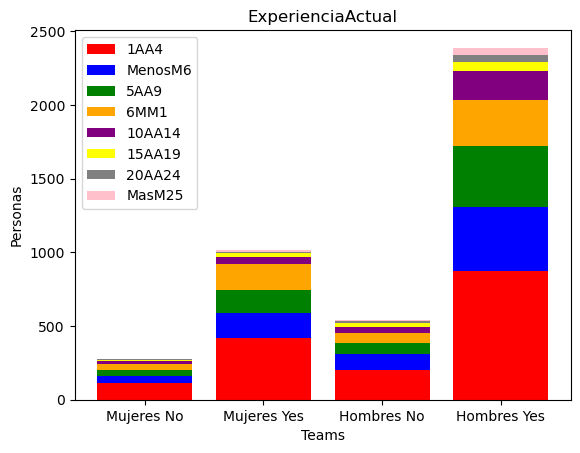

In [90]:
x3 = ["Mujeres No", "Mujeres Yes", "Hombres No", "Hombres Yes"]
y6_1 = np.array([mn_6_1, my_6_1, hn_6_1, hy_6_1])
y6_2 = np.array([mn_6_2, my_6_2, hn_6_2, hy_6_2])
y6_3 = np.array([mn_6_3, my_6_3, hn_6_3, hy_6_3])
y6_4 = np.array([mn_6_4, my_6_4, hn_6_4, hy_6_4])
y6_5 = np.array([mn_6_5, my_6_5, hn_6_5, hy_6_5])
y6_6 = np.array([mn_6_6, my_6_6, hn_6_6, hy_6_6])
y6_7 = np.array([mn_6_7, my_6_7, hn_6_7, hy_6_7])
y6_8 = np.array([mn_6_8, my_6_8, hn_6_8, hy_6_8])

plt.bar(x3, y6_1, color="red")
plt.bar(x3, y6_2, bottom=y6_1, color="blue")
plt.bar(x3, y6_3, bottom=y6_1+y6_2, color="green")
plt.bar(x3, y6_4, bottom=y6_1+y6_2+y6_3, color="orange")
plt.bar(x3, y6_5, bottom=y6_1+y6_2+y6_3+y6_4, color="purple")
plt.bar(x3, y6_6, bottom=y6_1+y6_2+y6_3+y6_4+y6_5, color="yellow")
plt.bar(x3, y6_7, bottom=y6_1+y6_2+y6_3+y6_4+y6_5+y6_6, color="Gray")
plt.bar(x3, y6_8, bottom=y6_1+y6_2+y6_3+y6_4+y6_5+y6_6+y6_7, color="Pink")

plt.xlabel("Teams")
plt.ylabel("Personas")
plt.legend(["1AA4", "MenosM6", "5AA9", "6MM1", "10AA14", "15AA19", "20AA24", "MasM25"])
plt.title("ExperienciaActual")
plt.show()

In [55]:
categoriaPositivo = df_all[df_all['Categoria_Num'] == 1]
categoriaNegativo = df_all[df_all['Categoria_Num'] == 0]

In [56]:
#Cuantos necesitan atencion
categoriaPositivo.shape

(17024, 11)

In [70]:
#Cuantos no necesitan atencion
categoriaNegativo.shape

(4075, 11)

In [74]:
num = len(categoriaNegativo)

4076

In [62]:
ps_nivel = categoriaPositivo[categoriaPositivo['NivelEstudios'] == 'Doctorado']
ps_nivel.shape


(42, 11)

In [59]:
ng_nivel = categoriaNegativo[categoriaNegativo['NivelEstudios'] == 'SinFormacion']
ng_nivel.shape

(258, 11)

In [17]:
ps_contratacion = categoriaPositivo[categoriaPositivo['ExperienciaActual'] == 'Mas25A']
ps_contratacion.shape

(292, 11)

In [22]:
ng_contratacion = categoriaNegativo[categoriaNegativo['ExperienciaActual'] == 'Mas25A']
ng_contratacion.shape


(63, 11)

In [36]:
mixto = categoriaPositivo[(categoriaPositivo['TipoPersonal'] == 'sindicalizado') & (categoriaPositivo['TipoJornada'] == 'nocturno')]
mixto.shape

(200, 11)

In [37]:
categoriaPositivo[categoriaPositivo['TipoPersonal'] == 'sindicalizado']

,Unnamed: 0,Genero,NivelEstudios,TipoContratacion,TipoPersonal,TipoJornada,Rotacion,ExperienciaActual,Resultado,Categoria,Categoria_Num
0,25,Masculino,Maestria,tiempoindeterminado,sindicalizado,diurno,SI,1A4A,92.0,Muy Alto,1
1,26,Masculino,Licenciatura,tiempoindeterminado,sindicalizado,diurno,NO,1A4A,54.0,Medio,1
2,27,Masculino,SinFormacion,porObraoProyecto,sindicalizado,diurno,SI,Menos6M,53.0,Medio,1
57,82,Femenino,Maestria,tiempoindeterminado,sindicalizado,diurno,NO,5A9A,72.0,Alto,1
68,93,Femenino,Licenciatura,porObraoProyecto,sindicalizado,diurno,SI,10A14A,92.0,Muy Alto,1
...,...,...,...,...,...,...,...,...,...,...,...
20956,20981,Masculino,Preparatoria,tiempodeterminado,sindicalizado,diurno,NO,1A4A,96.0,Muy Alto,1
20962,20987,Femenino,Licenciatura,otro,sindicalizado,diurno,NO,1A4A,70.0,Alto,1
20967,20992,Masculino,Preparatoria,tiempoindeterminado,sindicalizado,diurno,NO,10A14A,82.0,Alto,1
21014,21039,Masculino,Secundaria,tiempodeterminado,sindicalizado,diurno,NO,Menos6M,56.0,Medio,1
